# Liquid - Liquid Equilibria (Menthol + Octanoic acid + Water)

In [1]:
import numpy as np
from epcsaftpy import component, pcsaft
from sgtpy.equilibrium import lle, tpd_min, tpd_minimas, lle_init          # sgtpy module
import matplotlib.pyplot as plt
from scipy import optimize

**Parameters Menthol & Octanoic acid from:**<br />
M. Martins, E. Crespo, P. Pontes, L. Silva, M. Bülow, G. Maximo, E. Batista, C. Held, S. Pinho, and J. Coutinho. ACS Sustainable Chem. Eng. 6, 8836−8846 (2018). https://doi.org/10.1021/acssuschemeng.8b01203 <br /><br />
**Parameters Water from:**<br />
L. Cameretti, G. Sadowski. Chem. Eng. Process. 47, 1018-1025 (2008). https://doi.org/10.1016/j.cep.2007.02.034

In [2]:
OcAc = component('Octanoic acid (Caprylic acid)', ms = 7.0480, sigma = 3.1360, eps = 234.36,
                 kappaAB = 0.02000, eAB = 1889.20, sites = [0, 1, 1], Mw =  144.21)
Ment = component('Menthol', ms = 4.152, sigma = 3.903, eps = 262.40,
                 kappaAB = 0.0996, eAB = 1785.6 , sites = [0, 1, 1], Mw =  156.27)
Water = component('Water', ms = 1.2046817736, sigma = [2.7927, 10.11, -0.01775, -1.417, -0.01146], eps = 353.9449,
                 kappaAB = 0.045090, eAB = 2425.6714, sites = [0, 1, 1], Mw = 18.01528)
mix = OcAc + Ment + Water
saft = pcsaft(mix)

**Calculation**<br />
LLE calculation using sgtpy module (https://github.com/gustavochm/sgtpy)

In [3]:
P = 1.01325e5                    # Pressure [Pa]

n = 50
T0 = 270.       
Tf = 370.
T = np.linspace(T0, Tf, n)       # Temperature vector [K]
xmW = np.zeros_like(T)
wmW = np.zeros_like(T)

s = 2.0                          # molar ratio DES
zW = 0.8
zDES = 1 - zW
zHBD = s * zDES/(s + 1)
zHBA = zDES/(s + 1)
z = np.array([zHBD, zHBA, zW])
x0, w0 = lle_init(z, T0, P, saft)
for i in range(n):
    out = lle(x0, w0, z, T[i], P, saft, full_output=True)
    x0, w0 = out.X
    Mwx, Mww = np.dot(x0, saft.Mw), np.dot(w0, saft.Mw)
    xmW[i], wmW[i] = x0[2] * saft.Mw[2]/ Mwx, w0[2] * saft.Mw[2]/ Mww  # mol to mass fracction
    

**Plotting**<br />
Molecular Dynamic using Martini 3 Force Field

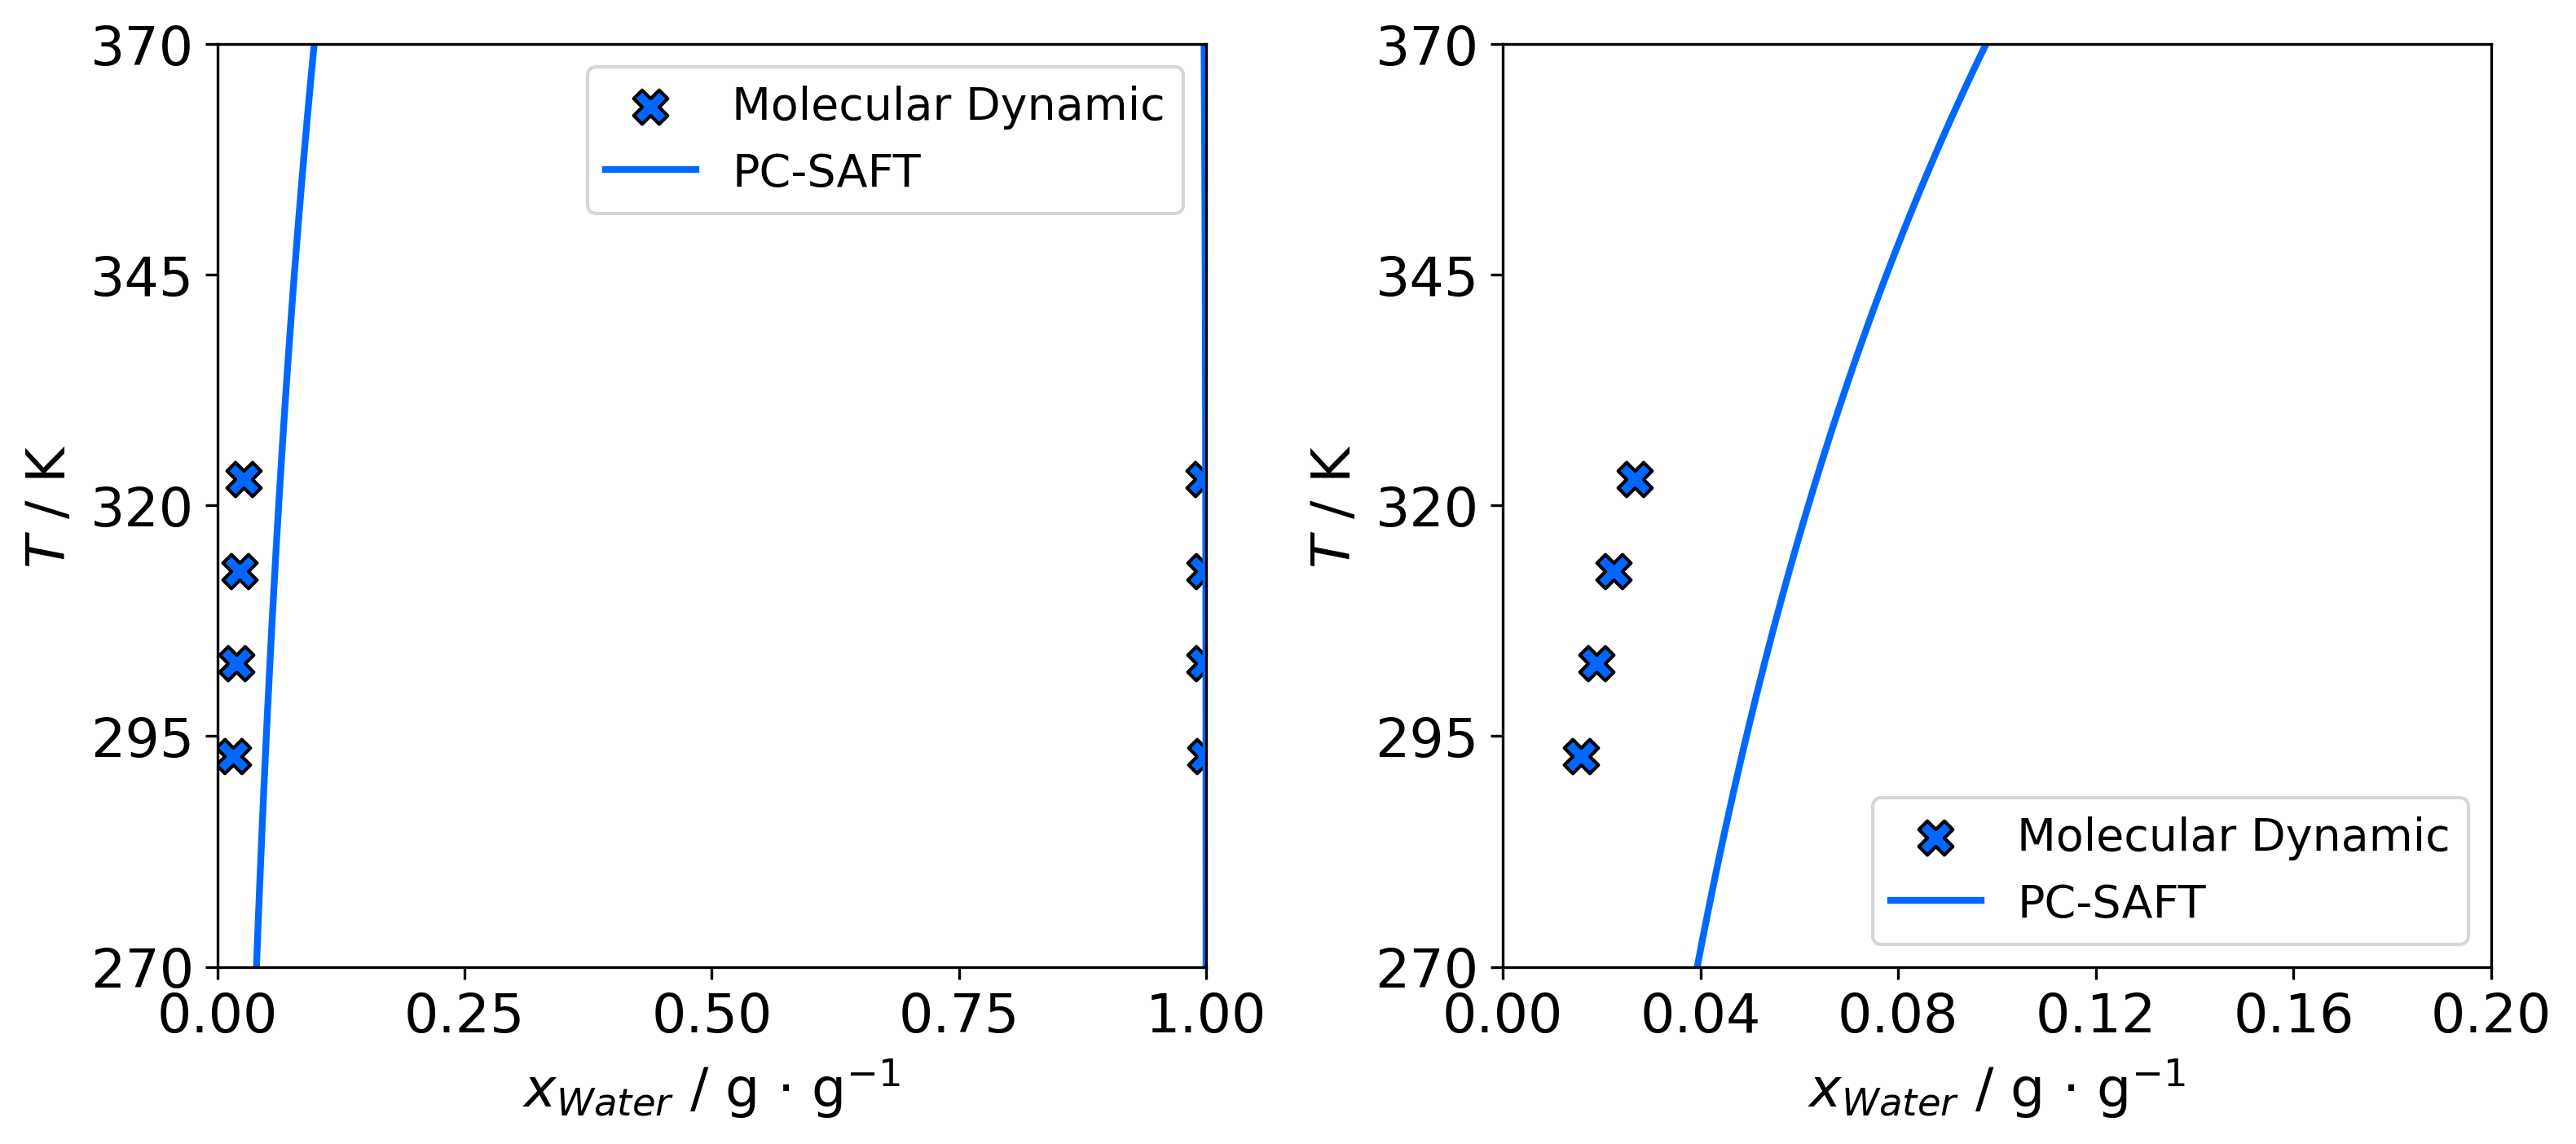

In [4]:
TMD = np.array([292.873, 302.859, 312.856, 322.855])
w1MD = np.array([0.01581, 0.01901, 0.02246, 0.02676])
x1MD = np.array([0.99896, 0.99859, 0.99831, 0.99766])

font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

colorLLE = "#0068FF"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax = axs[0]
ax.scatter(x1MD, TMD, s = 100, c = colorLLE, marker="X", 
            linewidth=1.0, edgecolor='k', label = "Molecular Dynamic")
ax.scatter(w1MD, TMD, s = 100, c = colorLLE, marker="X", 
            linewidth=1.0, edgecolor='k')
ax.plot(xmW, T, color = colorLLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(wmW, T, color = colorLLE , 
        linewidth = 2.0)

ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$x_{Water}$ / g $\cdot$ g$^{-1}$')
ax.axis([0, 1., T0, Tf])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))


ax = axs[1]
ax.scatter(x1MD, TMD, s = 100, c = colorLLE, marker="X", 
            linewidth=1.0, edgecolor='k', label = "Molecular Dynamic")
ax.scatter(w1MD, TMD, s = 100, c = colorLLE, marker="X", 
            linewidth=1.0, edgecolor='k')
ax.plot(xmW, T, color = colorLLE , 
        linewidth = 2.0, label = "PC-SAFT")
ax.plot(wmW, T, color = colorLLE , 
        linewidth = 2.0)

ax.legend(fontsize="small")
ax.set_ylabel('$T$ / K')
ax.set_xlabel('$x_{Water}$ / g $\cdot$ g$^{-1}$')
ax.axis([0, 0.2, T0, Tf])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 6))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))

plt.show()